# MA4402 Simulación estocástica - Laboratorio $\#1$
**Integrantes (Grupo 3):** Vicente Cabezas, Juan Cuevas, Manuel Torres.

**Fecha:** 21 de Septiembre, 2021.


# Problema 1 - Introducción a la simulación para Monte-Carlo

In [ ]:
# Librerias necesarias para correr el problema 1
import numpy as np
import random
from scipy.stats import uniform, bernoulli, binom, geom
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set_theme(style="darkgrid")
sns.set_palette('tab10')

### Parte 1

In [ ]:
def uniforme(n, metodo):
    """=========================================================================
    Input: Una cantidad n de replicas de la variable uniforme. El metodo debe 
    ser un string N,S, o R segun el metodo a implementar. Corresponden a los
    metodos clasicos de las librerias de python.
    Output: Un arreglo de n replicas de la variable aleatoria segun el metodo
    elegido.
    ========================================================================="""
    # Metodo con numpy
    if metodo == 'N':
        s = np.random.uniform(low=0,high = 1, size = n)
        return s
    # Metodo con scipy
    elif metodo == 'S':
        return uniform.rvs(size=n)
    # Metodo con random
    elif metodo == 'R':
        sample = []
        for i in range(n):
            sample.append(random.uniform(0,1))
        return sample

### Parte 2

In [ ]:
sample1 = uniforme(10**6,'N')
sample2 = uniforme(10**6,'S')
sample3 = uniforme(10**6,'R')

In [ ]:
def pltUni(data, bins, title):
    """=========================================================================
    Input: data corresponde a una muestra de V.A.'s uniformes, title el titulo
    que aparecera en la figura.
    Output: No retorna nada.
    Comentario: pltUni() es un grafico de la distribucion uniforme generada con
    alguno de los 3 metodos vistos antes, los metodos son distintas implementa-
    ciones de las librerias traidiconales de python.
    ========================================================================="""
    fig = plt.gcf()
    fig.set_size_inches(15, 8)
    sns.set(font_scale = 1.5)
    ax = sns.histplot(data = data, bins = bins, stat='density')
    ax.set(xlabel = 'Intervalo [0,1]',
           ylabel='Valor',
          title = title)
    x = np.linspace(0,1,30)
    plt.plot(x,[1 for i in range(30)],color='r',label='densidad teórica')
    plt.ylim(0.8,1.1)
    ax.legend()
    plt.show()

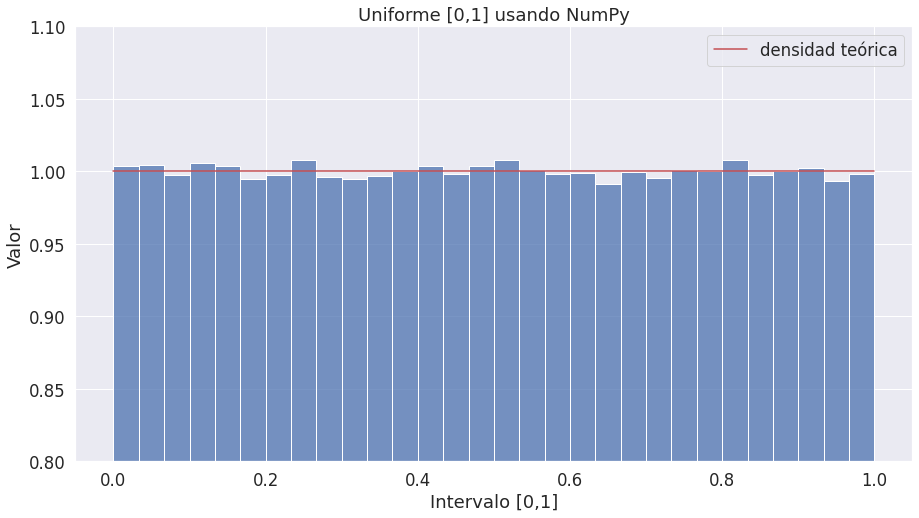

In [ ]:
# Figura de la distribucion uniforme usando numpy
pltUni(sample1, 30, 'Uniforme [0,1] usando NumPy')

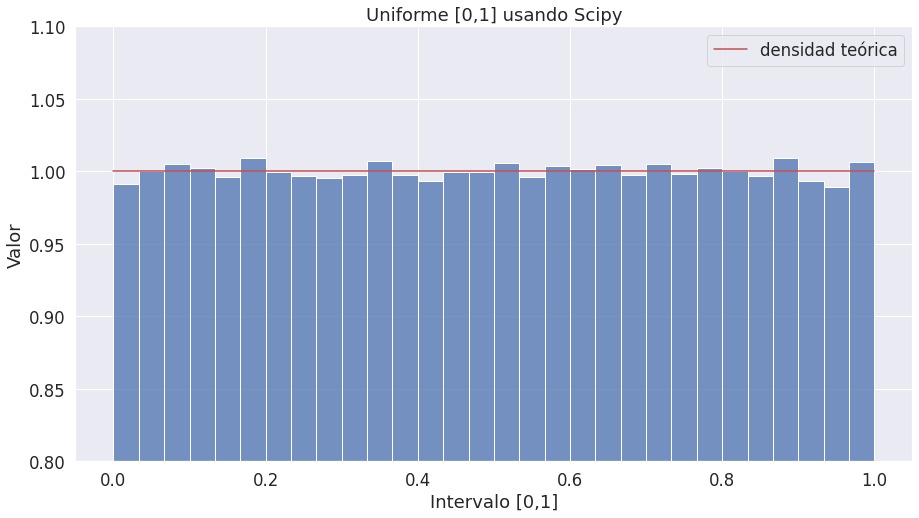

In [ ]:
# Figura de la distribucion uniforme usando scipy
pltUni(sample2, 30, 'Uniforme [0,1] usando Scipy')

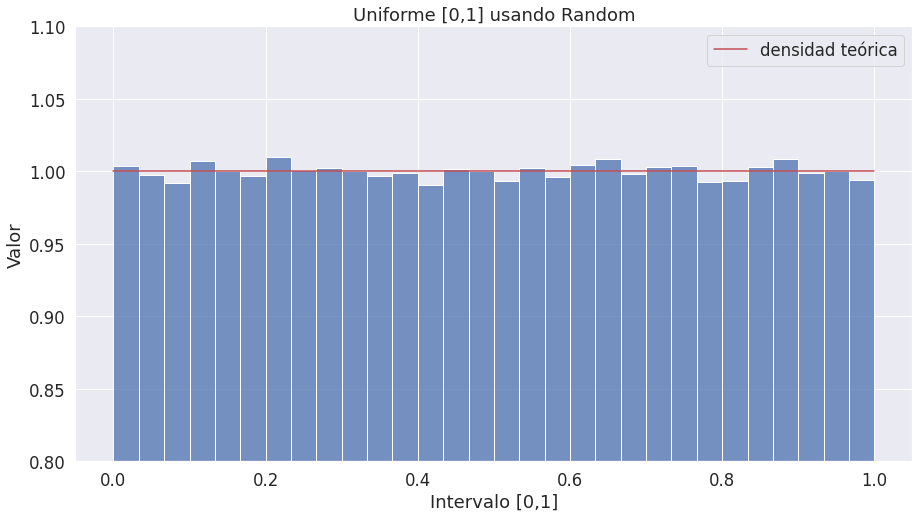

In [ ]:
# Figura de la distribucion uniforme usando random
pltUni(sample3, 30, 'Uniforme [0,1] usando Random')

### Parte 3

In [ ]:
#se guardan los tiempos empleados 
t_numpy = []
t_scipy = []
t_random = []
for _ in range(100):
    start_np = time.perf_counter()
    numpy = uniform(1000, 'N')
    end_np = time.perf_counter()
    t_numpy.append(end_np - start_np)
    
    start_scipy = time.perf_counter()
    scipy = uniform(1000, 'S')
    end_scipy = time.perf_counter()
    t_scipy.append(end_scipy - start_scipy)
    
    start_random = time.perf_counter()
    rndom = uniform(1000, 'R')
    end_random = time.perf_counter()
    t_random.append(end_random - start_random)
data = {
    'muestra': [i+1 for i in range(100)],
    'numpy': t_numpy,
    'scipy': t_scipy,
    'random': t_random}
df = pd.DataFrame(data, columns= ['muestra', 'numpy','scipy', 'random'])
data_stats = {'libreria': ['NumPy', 'Scipy','Random'],
              't_promedio': [df['numpy'].mean(),df['scipy'].mean(),df['random'].mean()],
              'var': [df['numpy'].var(),df['scipy'].var(),df['random'].var()]}
df_stats = pd.DataFrame(data_stats, columns=['libreria', 't_promedio', 'var']).set_index('libreria')

In [ ]:
df_stats

,t_promedio,var
libreria,,
NumPy,0.000622,8.672101e-09
Scipy,0.000635,1.531338e-08
Random,0.000641,1.389337e-08


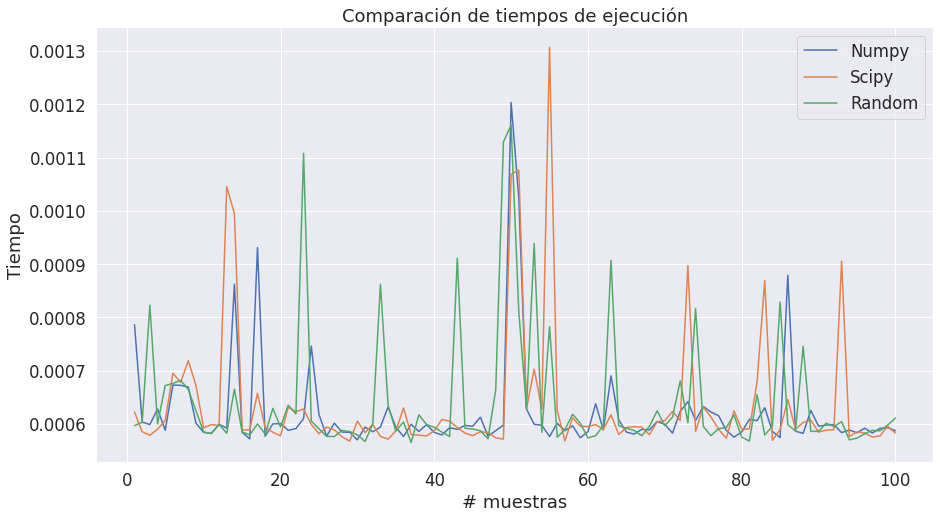

In [ ]:
fig = plt.gcf()
ax1 = sns.lineplot(x = 'muestra', y = 'numpy',data = df, label = 'Numpy')
ax2 = sns.lineplot(x = 'muestra', y = 'scipy', data = df, label = 'Scipy')
ax3 = sns.lineplot(x = 'muestra', y = 'random',data = df, label = 'Random')
ax1.set(ylabel = 'Tiempo', xlabel = '# muestras', title = 'Comparación de tiempos de ejecución')
sns.set(font_scale=1.5)
fig.set_size_inches(15, 8)
plt.show()

### Parte 4 
En base a lo visto en las tablas y gráficos anteriores se concluye que scipy es mas eficiente al momento de simular una distribucion uniforme, pues tiene menor media y varianza.

### Parte 5

In [ ]:
# Variable aleatoria bernoulli
def bern(p, size, metodo):
    if metodo == 'N':
        return np.random.binomial(1,p,size)
    elif metodo == 'S':
        return bernoulli.rvs(p,size = size)
    elif metodo == 'R':
        sample = []
        for i in range(size):
            val = 1 if random.uniform(0,1) < p else 0
            sample.append(val)
        return sample
# Variable aleatoria binomial
def bino(p, n, size, metodo):
    if metodo == 'N':
        return np.random.binomial(n,p,size)
    elif metodo == 'S':
        return binom.rvs(n,p,size=size)
    elif metodo == 'R':
        sample = []
        for _ in range(size):
            sample.append(sum(1 if random.uniform(0,1) < p else 0 for _ in range(n)))
        return sample
# Variable aleatoria geometrica
def geometric(p, size, metodo):
    if metodo == 'N':
        return np.random.geometric(p,size)
    elif metodo == 'S':
        return geom.rvs(p, size = size)
    elif metodo == 'R':
        sample = []
        for i in range(size):
            k = 1
            Flag = True
            while Flag:
                if random.uniform(0,1) < p:
                    sample.append(k)
                    Flag = False
                else:
                    k+=1
        return sample

In [ ]:
#se guardan los tiempos empleados 
t_numpy_ber = []
t_numpy_bin = []
t_numpy_geo = []
t_scipy_ber = []
t_scipy_bin = []
t_scipy_geo = []
t_random_ber = []
t_random_bin = []
t_random_geo = []

p = 0.5
N = 10
n = 1000
for _ in range(100):
    
    start_np = time.perf_counter()
    numpy_ber = bern(p, n, 'N')
    tic_1 = time.perf_counter()
    numpy_bin = bino(p, N , n , 'N')
    tic_2 = time.perf_counter()
    numpy_geo = geometric(p, n , 'N')
    end_np = time.perf_counter()
    
    t_numpy_ber.append(tic_1 - start_np)
    t_numpy_bin.append(tic_2 - tic_1)
    t_numpy_geo.append(end_np - tic_2)
    
    start_sc = time.perf_counter()
    scipy_ber = bern(p, 1000, 'S')
    tac_1 = time.perf_counter()
    scipy_bin = bino(p,N, n , 'S')
    tac_2 = time.perf_counter()
    scipy_geo = geometric(p, n , 'S')
    end_sc = time.perf_counter()
    
    t_scipy_ber.append(tac_1 - start_sc)
    t_scipy_bin.append(tac_2 - tac_1)
    t_scipy_geo.append(end_sc - tac_2)
    
    
    start_rd = time.perf_counter()
    randm_ber = bern(p, 1000, 'R')
    toc_1 = time.perf_counter()
    random_bin = bino(p, N, n, 'R')
    toc_2 = time.perf_counter()
    random_geo = geometric(p, n, 'R')
    end_rd = time.perf_counter()
    
    t_random_ber.append(toc_1 - start_rd)
    t_random_bin.append(toc_2 - toc_1)
    t_random_geo.append(end_rd - toc_2)

In [ ]:
data_ber = {
    'muestra': [i+1 for i in range(100)],
    'numpy': t_numpy_ber,
    'scipy': t_scipy_ber,
    'random': t_random_ber}
df_ber = pd.DataFrame(data_ber, columns= ['muestra', 'numpy','scipy', 'random'])
data_stats_ber = {'libreria': ['NumPy', 'Scipy','Random'],
              't_promedio': [df_ber['numpy'].mean(),df_ber['scipy'].mean(),df_ber['random'].mean()],
              'var': [df_ber['numpy'].var(),df_ber['scipy'].var(),df_ber['random'].var()]}
df_stats_ber = pd.DataFrame(data_stats_ber, columns=['libreria', 't_promedio', 'var']).set_index('libreria')

In [ ]:
df_stats_ber

,t_promedio,var
libreria,,
NumPy,0.000067,5.921808e-09
Scipy,0.000136,1.470085e-09
Random,0.000453,5.462154e-09


In [ ]:
data_bin = {
    'muestra': [i+1 for i in range(100)],
    'numpy': t_numpy_bin,
    'scipy': t_scipy_bin,
    'random': t_random_bin}
df_bin = pd.DataFrame(data_bin, columns= ['muestra', 'numpy','scipy', 'random'])
data_stats_bin = {'libreria': ['NumPy', 'Scipy','Random'],
              't_promedio': [df_bin['numpy'].mean(),df_bin['scipy'].mean(),df_bin['random'].mean()],
              'var': [df_bin['numpy'].var(),df_bin['scipy'].var(),df_bin['random'].var()]}
df_stats_bin = pd.DataFrame(data_stats_bin, columns=['libreria', 't_promedio', 'var']).set_index('libreria')

In [ ]:
df_stats_bin

,t_promedio,var
libreria,,
NumPy,0.000073,1.499515e-09
Scipy,0.000145,2.756804e-09
Random,0.004773,1.357151e-07


In [ ]:
data_geo = {
    'muestra': [i+1 for i in range(100)],
    'numpy': t_numpy_geo,
    'scipy': t_scipy_geo,
    'random': t_random_geo}
df_geo = pd.DataFrame(data_geo, columns= ['muestra', 'numpy','scipy', 'random'])
data_stats_geo = {'libreria': ['NumPy', 'Scipy','Random'],
              't_promedio': [df_geo['numpy'].mean(),df_geo['scipy'].mean(),df_geo['random'].mean()],
              'var': [df_geo['numpy'].var(),df_geo['scipy'].var(),df_geo['random'].var()]}
df_stats_geo = pd.DataFrame(data_stats_geo, columns=['libreria', 't_promedio', 'var']).set_index('libreria')

In [ ]:
df_stats_geo

,t_promedio,var
libreria,,
NumPy,0.000054,1.406147e-09
Scipy,0.000115,5.128386e-09
Random,0.000889,4.305178e-08


Luego de comparar las tablas obtenidas anteriormente se puede ver claramente que la librería Numpy es superior con respecto a las otras, contra Scipy es ligeramente mejor, mientras que para Random, hay una gran diferencia, principalmente porque los dos primeros métodos vienen internalizados en las librería, mientras que para el último se debieron realizar varias iteraciones de uniformes [0,1] para conseguir lo pedido.

### Parte 6

Los números pseudoaleatorios son aquellos numeros que simulan ser aleatorios pero provienen de métodos deterministas, en particular, Python utiliza el método de "Mersenne Twister", el cual genera estos números utilizando los primos de Mersenne, los cuales son numeros de la forma $2^{n} - 1$, y que además son primos, los bits de precisión que alcanzan los puntos flotantes son de $53$ y tiene un período de $2^{19937} - 1$. Este generador permite cambiar la semilla que inicializa el algoritmo con el comando "random.seed(semilla)". 

# Problema 2
Tomando en *cuenta* que
\begin{equation*}
    I = \frac{\pi}{4} = \int_{0}^{1} \sqrt{1-x^{2}}dx = \int_{0}^{1}\int_{0}^{1} \chi_{\{x^{2}+y^{2}\leq 1\}}dxdy,
\end{equation*}
consideraremos dos métodos de Monte Carlo para calcular numéricamente $I$ (que corresponde a un cuarto del área de un círculo de radio unitario).

Consideremos las variables aleatorias
\begin{eqnarray*}
    X &=& \sqrt{1 - U^{2}},\quad U\sim\text{Unif}[0,1];\\
    Z &=& \chi_{\{ U_{1}^{2}+U_{2}^{2} \leq 1\}},\quad U_{1},U_{2}\sim\text{Unif}[0,1].
\end{eqnarray*}

In [ ]:
# Librerías necesarias para correr el problema 2
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import time

## Parte 1
### Enunciado
Calcule las varianzas $\text{Var}(X)$ y $\text{Var}(Z)$ de forma teórica y de forma simulada con diferentes cantidades de réplicas $n$. Grafique. Estime una cantidad de réplicas necesarias para $X$ y $Z$ con tal de obtener una aproximación de la varianza con un error del orden del $1\%$.**texto en negrita**

### Desarrollo 
**Preliminares:** Recordemos que para una variable aleatoria $X$, su varianza es puede expresar como 
\begin{equation}
    \mathbb{V}ar(X) = \mathbb{E}(X^{2}) - \mathbb{E}^{2}(X).
\end{equation}

También recordemos que para una función $f\in L^{1}$ luego $f(X)$ tiene la siguiente esperanza:
\begin{equation}
    \mathbb{E}(f(X)) = \int_{\Omega} f(x)f_{X}(x)dx,
\end{equation}
donde $f_{X}(x)$ es la densidad de la variable aleatoria $X$.

**Calculo teórico para $X$:** Calculamos las esperanzas necesarias para tener $\mathbb{V}ar(X)$: 

1.   Sea $X = g(U)$ dada por $g(U) = \sqrt{1 - U^{2}}$,
2.   y sea $X^{2} = f(U)$ con $f(U) = 1 - U^{2}$.

Entonces:

1.    Calculamos $\mathbb{E}(X)$ teniendo presente que $\int_{0}^{1}\sqrt{1-u^{2}}du$ corresponde a un cuarto del área de un círculo de radio $1$.
\begin{eqnarray*}
    \mathbb{E}(X) = \mathbb{E}(g(U))
    &=&    \int_{\Omega} \sqrt{1-u^{2}}f_{U}(u)du \\
    &=&    \int_{\Omega} \sqrt{1-u^{2}}\chi_{u\in[0,1]}du\\
    &=&    \int_{0}^{1} \sqrt{1-u^{2}}du = \frac{\pi}{4}.
\end{eqnarray*}    
2.   Calculamos $\mathbb{E}(X^{2})$.
\begin{eqnarray*}
    \mathbb{E}(X^{2}) = \mathbb{E}(f(U))
    &=&    \int_{\Omega} (1-u^{2})f_{U}(u)du\\
    &=&    \int_{\Omega} (1-u^{2})\chi_{u\in[0,1]}du\\
    &=&    \int_{0}^{1} 1-u^{2} du = \frac{2}{3}.\\
\end{eqnarray*}

Luego tenemos que
\begin{equation*}
    \mathbb{V}ar(X) = \frac{2}{3} - \frac{\pi^{2}}{16}.
\end{equation*}



**Calculo teórico para $Z$:** Calculamos las esperanzas necesarias para tener $\mathbb{V}ar(Z)$:

1.   Consideramos $Z = g(U_{1},U_{2})$ dada por $Z = \chi_{\{ U_{1}^{2}+U_{2}^{2} \leq 1\}}$.
2.   Además notamos que $g(U_{1},U_{2}) = g^{2}(U_{1},U_{2})$.

Donde $U_{1}$ y $U_{2}$ son variables aleatorias independientes, y por lo tanto su función de densidad $f_{U_{1},U_{2}}$ cumple que $f_{U_{1},U_{2}} = f_{U_{1}}f_{U_{2}}$.

1.   Calculamos $\mathbb{E}(Z)$:
\begin{eqnarray*}
    \mathbb{Z} = \mathbb{E}(g(U_{1},U_{2}))
    &=&    \int_{\Omega} \chi_{\{ u_{1}^{2} + u_{2}^{2} \leq 1\}} f_{U_{1},U_{2}} (u_{1},u_{2}) du\\
    &=&    \int_{0}^{1}\int_{0}^{1} \chi_{\{ u_{1}^{2} + u_{2}^{2} \leq 1\}} du_{1} du_{2} = \frac{\pi}{4}.
\end{eqnarray*}

2.   Calculamos $\mathbb{E}(Z^{2})$:
\begin{eqnarray*}
    \mathbb{E}(Z^{2}) = \mathbb{E}(g^{2}(U_{1},U_{2})) = \mathbb{E}(g^{2}(U_{1},U_{2})) = \frac{\pi}{4}.
\end{eqnarray*}

Luego tenemos que 
\begin{equation*}
    \mathbb{V}ar(Z) = \frac{\pi}{4} - \left(\frac{\pi}{4}\right)^{2}.
\end{equation*}

In [ ]:
# Esperanzas teoricas calculadas:
esperanza_teo_X = np.pi/4
esperanza_teo_Z = np.pi/4
# Varianzas teoricas calculadas:
var_teo_X = 2/3 - (np.pi/4)**2;
var_teo_Z = (np.pi/4) - (np.pi/4)**2 ;

A continuación estimamos las varianzas $\mathbb{V}ar(X)$ y $\mathbb{V}ar(Z)$.

In [ ]:
"""=============================================================================
FUNCIONES DE LA CELDA:
1) simulacion_X
2) simulacion_Z
3) simulacion_var_X
4) simulacion_var_Z
5) grafico_varianza_X
6) grafico_varianza_Z
============================================================================="""

# Simulaciones de X y Z en n replicas
def simulacion_X(n):
    """=========================================================================
    Input: n = Cantidad de replicas de la variable aleatoria X.
    Output: Retorna n replicas de la variable aleatoria X.
    ========================================================================="""
    X = np.sqrt(1 - np.random.uniform(0,1,n)**2)    # Definicion de X
    output = X
    return output
def simulacion_Z(n):
    """=========================================================================
    Input: n = Cantidad de replicas de la variable aleatoria Z.
    Output: Retorna n replicas de la variable aleatoria Z.
    ========================================================================="""
    U_1 = np.random.uniform(0,1,n)  # Definicion de U_1
    U_2 = np.random.uniform(0,1,n)  # Definicion de U_2
    R = U_1**2 + U_2**2             # Definicion de R (puede ser mayor que 1)
    S = np.zeros(len(R))            # Definicion de S segun la indicatriz
    for i in range(len(R)):
        if R[i] <= 1:
            S[i] = 1
    output = S
    return output

# Calculo de la varianza en funcion de n replicas de las variables aleatorias
def simulacion_var_X(n):
    """=========================================================================
    Input: n = Cantidad de replicas de la variable aleatoria X.
    Output: Retorna n varianzas simuladas, donde la k-esima varianza corresponde
    a la estimacion utilizando k simulaciones de X, con k menor o igual a n
    ========================================================================="""
    muestra_aleatoria_X = simulacion_X(n)  # Tomamos n variables aleatorias X
    varianza_X = []                        # Generamos un arreglo de largo n
    for i in range(len(muestra_aleatoria_X)):     # Calcula las varianzas
        varianza_X.append(np.var(muestra_aleatoria_X[:i]))
    output = varianza_X
    return output
def simulacion_var_Z(n):
    """=========================================================================
    Input: n = Cantidad de replicas de la variable aleatoria Z.
    Output: Retorna n varianzas simuladas, donde la k-esima varianza corresponde
    a la estimacion utilizando k simulaciones de Z, con k menor o igual a n
    ========================================================================="""
    variable_aleatoria_Z = simulacion_Z(n)  # Tomamos n variables aleatorias Z
    varianza_Z = np.zeros(n)                # Generamos un arreglo de largo n
    for i in range(len(variable_aleatoria_Z)):     # Calcula las varianzas
        varianza_Z[i] = np.var(variable_aleatoria_Z[:i])
    output = varianza_Z
    return output

# Grafico de las varianzas en funcion de la cantidad de replicas
def grafico_varianza_X(n):
    """=========================================================================
    Input: n = Cantidad de replicas de la variable aleatoria X.
    Output: Retorna una curva de la varianza estimada en funcion de la cantidad
    de replicas de la variable aleatoria X.
    ========================================================================="""
    cantidad_de_la_muestra = np.arange(0, n)
    # Configuracion de la figura
    plt.figure(figsize=(10, 5))
    plt.grid()
    plt.title('Estimacion de la varianza de $X$')
    plt.xlabel('Cantidad de replicas de $X$')
    plt.ylabel('Estimacion de $\mathbb{V}ar(X)$')
    plt.fill_between(cantidad_de_la_muestra, var_teo_X-0.01*var_teo_X, 
                     var_teo_X+0.01*var_teo_X, alpha=0.5,
                     edgecolor='#CC4F1B', facecolor='#FF9848', label = 'media')
    plt.legend()
    output = plt.plot(cantidad_de_la_muestra , simulacion_var_X(n),)
    return output
def grafico_varianza_Z(n):
    """=========================================================================
    Input: n = Cantidad de replicas de la variable aleatoria Z.
    Output: Retorna una curva de la varianza estimada en funcion de la cantidad
    de replicas de la variable aleatoria Z.
    ========================================================================="""
    cantidad_de_la_muestra = np.arange(0, n)
    # Configuracion de la figura
    plt.figure(figsize=(10, 5))
    plt.grid()
    plt.title('Estimacion de la varianza de $Z$')
    plt.xlabel('Cantidad de replicas de $Z$')
    plt.ylabel('Estimacion de $\mathbb{V}ar(Z)$')
    plt.fill_between(cantidad_de_la_muestra, var_teo_Z-0.01*var_teo_Z, 
                     var_teo_Z+0.01*var_teo_Z, alpha = 0.5,
                     edgecolor='#CC4F1B', facecolor='#FF9848')
    output = plt.plot(cantidad_de_la_muestra , simulacion_var_Z(n),)
    return output

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


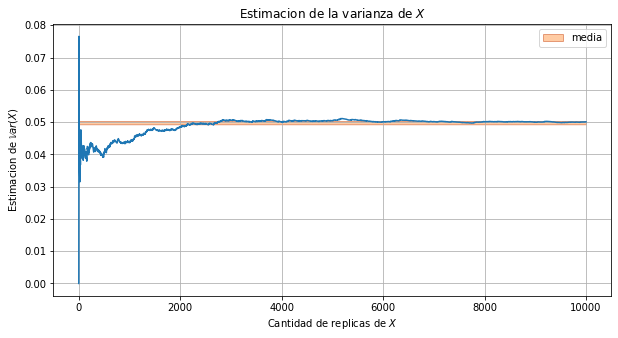

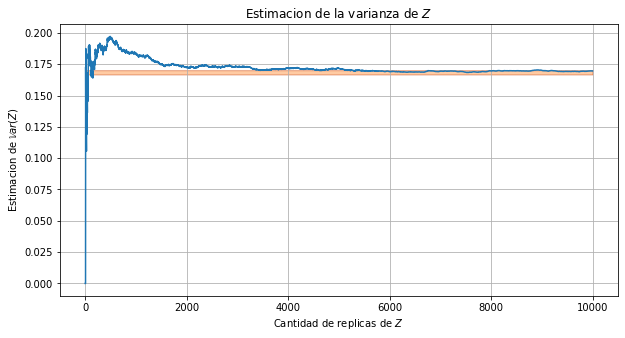

In [ ]:
# Figuras de varianzas estimadas para n = 10000
grafico_varianza_X(10000)
grafico_varianza_Z(10000)

## Parte 2
### Enunciado
Calcule la cantidad de réplicas necesarias para $X$ y $Z$ con tal de aproximar $I$ con un error máximo y probabilidad dada según cada caso.

1.   Error máximo $Err_{1} = 0.1$ y probabilidad $Pr_{1} = 90\%$.
2.   Error máximo $Err_{2} = 0.01$ y probabilidad $Pr_{2} = 95\%$.
3.   Error máximo $Err_{3} = 0.001$ y probabilidad $Pr_{2} = 99\%$.

### Desarrollo
La cantidad de réplicas necesarias $n$ para estimar $I = \frac{\pi}{4}$ (ya vista antes como dos integrales aparentemente diferentes) con un error $\varepsilon$ con probabilidad $1-\alpha$ debe satisfacer la siguiente desigualdad:
\begin{equation*}
    \frac{Z_{\alpha/2}\cdot\sigma^{2}}{\varepsilon^{2}} \leq n.
\end{equation*}

**Cálculos para X:** Considerando $\mathbb{V}ar(X)\approx0.05$, luego según cada caso:

1.   Tenemos que $Z_{\alpha/2} = 1.65$, entonces
\begin{equation*}
    14 \approx \frac{1.65^{2}\cdot0.05}{0.1^{2}} \leq n_{1}.
\end{equation*}
2.   Tenemos que $Z_{\alpha/2} = 1.96$, entonces
\begin{equation*}
    1914 \approx \frac{1.96^{2}\cdot0.05}{0.01^{2}} \leq n_{2}.
\end{equation*}
3.   Tenemos que $Z_{\alpha/2} = 2.58$, entonces
\begin{equation*}
    330527 \approx \frac{2.58^{2}\cdot0.05}{0.001^{2}} \leq n_{3}.
\end{equation*}



**Cálculos para Z:** Considerando $\mathbb{V}ar(Z)\approx0.168$, luego según cada caso:

1.   Tenemos que $Z_{\alpha/2} = 1.65$, entonces
\begin{equation*}
    46 \approx \frac{1.65^{2}\cdot0.168}{0.1^{2}} \leq n_{1}.
\end{equation*}
2.   Tenemos que $Z_{\alpha/2} = 1.96$, entonces
\begin{equation*}
    6452 \approx \frac{1.96^{2}\cdot0.168}{0.01^{2}} \leq n_{2}.
\end{equation*}
3.   Tenemos que $Z_{\alpha/2} = 2.58$, entonces
\begin{equation*}
    1114371 \approx \frac{2.58^{2}\cdot0.168}{0.01^{2}} \leq n_{2}.
\end{equation*}

**Verificación de los resultados:** A continuación presentamos una función que permite verificar el valor de $n$ obtenido en función de la varianza teórica, el error máximo y la probabilidad:


In [ ]:
# Verificacion mediante calculo computacional
def verificar_estimador_de_var(varianza, error, probabilidad):
    """=========================================================================
    Input: Varianza teorica, error maximo y probabilidad de certeza.
    Output: Una cantidad n suficiente para estimar la varianza con la 
    probabilidad y el error pedidos
    Contrato: La funcion ayuda a verificar que el calculo de un n suficiente
    haya sido bien realizado.
    ========================================================================="""
    zeta = stats.norm.ppf((1+probabilidad/100)/2)
    n = np.floor((varianza * zeta**2)/(error**2)) + 1
    output = n
    return output

**Gráficos:** Veamos a continuación que la estimación de la varianza vista en la *parte 1* se estabiliza dentro del margen teórico para una cantidad $n_{3}$ de réplicas.

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


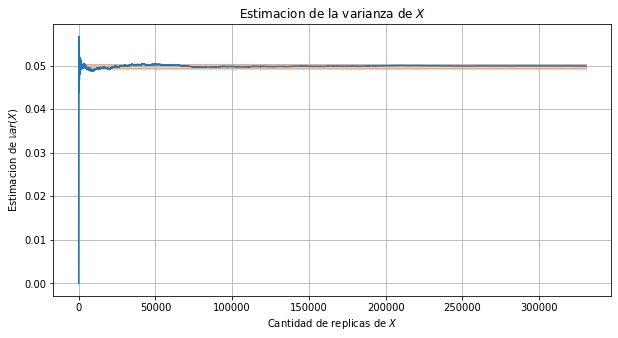

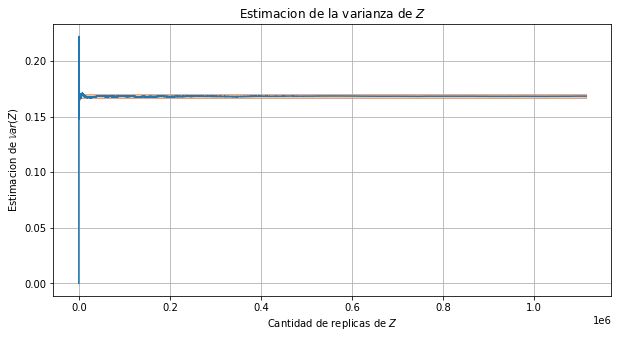

In [ ]:
# Figuras de varianzas estimadas con los n_3 suficientes estimados
grafico_varianza_X(330527)
grafico_varianza_Z(1114371)

## Parte 3
### Enunciado
Aproxime las esperanzas $\mathbb{E}(X)$ y $\mathbb{E}(Z)$ de forma simulada con diferentes cantidades de réplicas $n$ hasta llegar al $n^{\star}$ tal que cumple el caso 3 de la parte anterior. Grafique las aproximaciones en función de la cantidad de réplicas. Grafique el tiempo utilizado en aproximar las esperanzas en función de la cantidad de réplicas. Estime los costos de simular una réplica de $X$ y una réplica de $Z$.

### **Desarrollo**
Recordemos que por la ley de los grandes números
\begin{eqnarray*}
    \frac{1}{n}\sum_{i=1}^{n} X_{i} \underset{c.s}{\longrightarrow} \mathbb{E}(X).
\end{eqnarray*}
Usamos esta convergencia c.s. para simular la esperanza de forma numérica utilizando $n$ réplicas de la variable aleatoria correspondiente.

In [ ]:
"""=============================================================================
FUNCIONES DE LA CELDA:
1) simulacion_experanza_X
2) simulacion_esperanza_Z
3) grafico_esperanza_X
4) grafico_esperanza_Z
5) grafico_tiempo_esperanza_X
6) grafico_tiempo_esperanza_Z
============================================================================="""
# Calculo de la esperanza en funcion de n replicas de las variables aleatorias
def simulacion_esperanza_X(n):
    """=========================================================================
    Input: n = Cantidad de replicas de la variable aleatoria X.
    Output: Retorna la esperanza estimada a un vector de n replicas de la varia-
    ble aleatoria X y el tiempo que demora en calcular.
    ========================================================================="""
    tiempo_inicial = time.time()                    # Tiempo de inicio
    replicas_variable_aleatoria = simulacion_X(n)                # Muestra de X  
    estimacion_esperanza = np.sum(replicas_variable_aleatoria)/n # Esperanza sim
    tiempo_final = time.time()                      # Tiempo final
    delta_tiempo = tiempo_final - tiempo_inicial    # Tiempo que demora
    output = np.array([estimacion_esperanza, delta_tiempo])
    return output
def simulacion_esperanza_Z(n):
    """=========================================================================
    Input: n = Cantidad de replicas de la variable aleatoria Z.
    Output: Retorna la esperanza estimada a un vector de n replicas de la varia-
    ble aleatoria Z y el tiempo que demora en calcular.
    ========================================================================="""
    tiempo_inicial = time.time()                    # Tiempo de inicio
    replicas_variable_aleatoria = simulacion_Z(n)                # Muestra de Z  
    estimacion_esperanza = np.sum(replicas_variable_aleatoria)/n # Esperanza sim
    tiempo_final = time.time()                      # Tiempo final
    delta_tiempo = tiempo_final - tiempo_inicial    # Tiempo que demora
    output = np.array([estimacion_esperanza, delta_tiempo])
    return output
# Grafico de las esperanzas en funcion de la cantidad de replicas
def grafico_esperanza_X(n):
    """=========================================================================
    Input: n = Cantidad de replicas de la variable aleatoria X.
    Output: Retorna una curva de la esperanza estimada en funcion de la cantidad
    de replicas de la variable aleatoria X.
    ========================================================================="""
    cantidad_de_la_muestra = np.arange(0, n)        # Cantidad de replicas
    esperanzas_simuladas = np.zeros(n)              # Esperanzas calculadas
    # Se calcula la esperanza para todo k <= n replicas para poder graficar
    # la esperanza estimada en funcion de su cantidad de replicas
    for i in range(n):                              
        esperanzas_simuladas[i] = simulacion_esperanza_X(i)[0]
    # Configuracion de la figura
    plt.figure(figsize=(10, 5))
    plt.grid()
    plt.title('Estimacion de la esperanza de $X$')
    plt.xlabel('Cantidad de replicas de $X$')
    plt.ylabel('Estimacion de $\mathbb{E}(X)$')
    plt.fill_between(cantidad_de_la_muestra, 
                     esperanza_teo_X-0.01*esperanza_teo_X, 
                     esperanza_teo_X+0.01*esperanza_teo_X, alpha=0.5,
                     edgecolor='#CC4F1B', facecolor='#FF9848')
    output = plt.plot(cantidad_de_la_muestra , esperanzas_simuladas)
    return output
def grafico_esperanza_Z(n):
    """=========================================================================
    Input: n = Cantidad de replicas de la variable aleatoria Z.
    Output: Retorna una curva de la esperanza estimada en funcion de la cantidad
    de replicas de la variable aleatoria Z.
    ========================================================================="""
    cantidad_de_la_muestra = np.arange(0, n)        # Cantidad de replicas
    esperanzas_simuladas = np.zeros(n)              # Esperanzas calculadas
    # Se calcula la esperanza para todo k <= n replicas para poder graficar
    # la esperanza estimada en funcion de su cantidad de replicas
    for i in range(n):                              
        esperanzas_simuladas[i] = simulacion_esperanza_Z(i)[0]
    # Configuracion de la figura
    plt.figure(figsize=(10, 5))
    plt.grid()
    plt.title('Estimacion de la esperanza de $Z$')
    plt.xlabel('Cantidad de replicas de $Z$')
    plt.ylabel('Estimacion de $\mathbb{E}(Z)$')
    plt.fill_between(cantidad_de_la_muestra, 
                     esperanza_teo_Z-0.01*esperanza_teo_Z, 
                     esperanza_teo_Z+0.01*esperanza_teo_Z, alpha=0.5,
                     edgecolor='#CC4F1B', facecolor='#FF9848')
    output = plt.plot(cantidad_de_la_muestra , esperanzas_simuladas)
    return output
# Grafico de los costos temporales en funcion de la cantidad de replicas
def grafico_tiempo_esperanza_X(n):
    """=========================================================================
    Input: n = Cantidad de replicas de la variable aleatoria X.
    Output: Retorna una curva del tiempo de calculo en funcion de la cantidad
    de replicas de la variable aleatoria X.
    ========================================================================="""
    cantidad_de_la_muestra = np.arange(0, n)        # Cantidad de replicas
    tiempo_en_simular_esperanza = np.zeros(n)       # Tiempo en simular
    # Se calcula la esperanza para todo k <= n replicas para poder graficar
    # la esperanza estimada en funcion de su cantidad de replicas
    for i in range(n):                              
        tiempo_en_simular_esperanza[i] = simulacion_esperanza_X(i)[1]
    # Configuracion de la figura
    plt.figure(figsize=(10, 5))
    plt.grid()
    plt.title('Tiempo en estimar la esperanza de $X$')
    plt.xlabel('Cantidad de replicas de $X$')
    plt.ylabel('Tiempo')
    output = plt.plot(cantidad_de_la_muestra , tiempo_en_simular_esperanza)
    return output
def grafico_tiempo_esperanza_Z(n):
    """=========================================================================
    Input: n = Cantidad de replicas de la variable aleatoria Z.
    Output: Retorna una curva del tiempo de calculo en funcion de la cantidad
    de replicas de la variable aleatoria Z.
    ========================================================================="""
    cantidad_de_la_muestra = np.arange(0, n)        # Cantidad de replicas
    tiempo_en_simular_esperanza = np.zeros(n)       # Tiempo en simular
    # Se calcula la esperanza para todo k <= n replicas para poder graficar
    # la esperanza estimada en funcion de su cantidad de replicas
    for i in range(n):                              
        tiempo_en_simular_esperanza[i] = simulacion_esperanza_Z(i)[1]
    # Configuracion de la figura
    plt.figure(figsize=(10, 5))
    plt.grid()
    plt.title('Tiempo en estimar la esperanza de $Z$')
    plt.xlabel('Cantidad de replicas de $Z$')
    plt.ylabel('Tiempo')
    output = plt.plot(cantidad_de_la_muestra , tiempo_en_simular_esperanza)
    return output

**Esperanza simulada en función de la cantidad de réplicas:** A continuación vemos los gráficos de la esperanza estimada para la variable aleatoria en función de la cantidad de réplicas utilizadas, comparándola con la esperanza teórica (conocida desde la *parte 1*).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


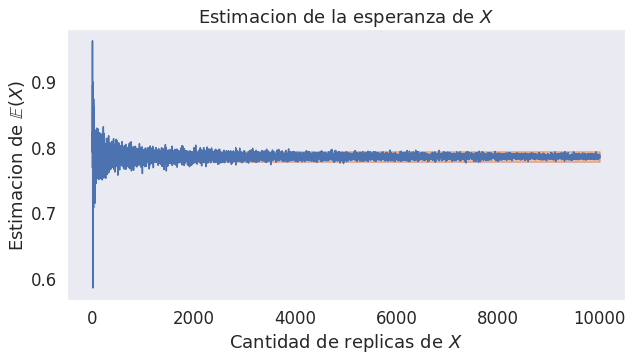

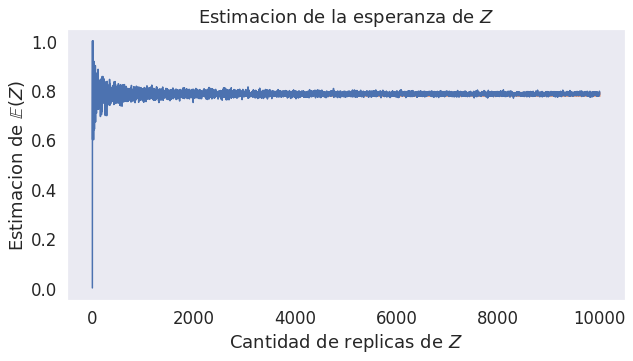

In [ ]:
# Figura de la esperanza simulada en funcion de la cantidad de replicas
grafico_esperanza_X(10000)
grafico_esperanza_Z(10000)

**Tiempo que demora en estimar la esperanza en función de la cantidad de réplicas:** A continuación vemos las gráficas del tiempo de demora en estimar la esperanza de la variable aleatoria respectiva en función de la cantidad de réplicas.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


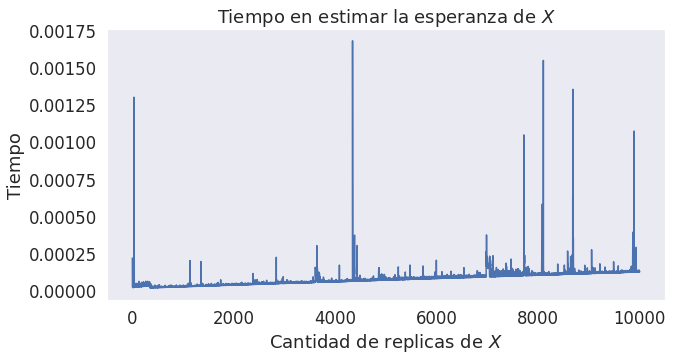

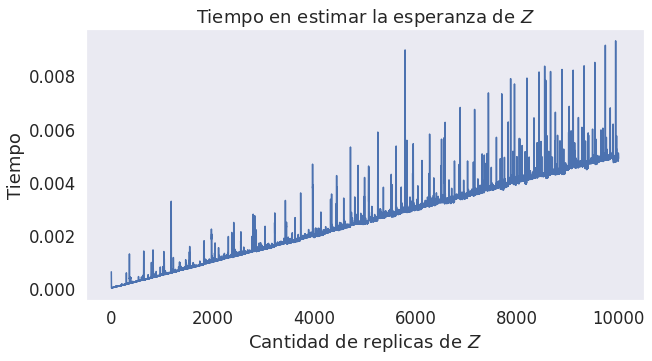

In [ ]:
# Figura del tiempo que demora en calcular la esperanza en funcion de la
# cantidad de replicas de la variable aleatoria
grafico_tiempo_esperanza_X(10000)
grafico_tiempo_esperanza_Z(10000)

**Costo de simular una réplica:** A continuación calculamos el tiempo que demora la simulación de una réplica de la variable aleatoria $X$ y $Z$ respectivamente. Para esto hacemos funciones que simulen una cantidad $n$ de réplicas, calculamos el tiempo que demora dicha función y luego lo dividiremos en $n$, esto para tener una aproximación mejor.

In [ ]:
"""=============================================================================
FUNCIONES DE LA CELDA:
1) tiempo_simular_X
2) tiempo_simular_Z
3) grafica_tiempo_simular_X
4) grafica_tiempo_simular_Z
============================================================================="""
def tiempo_simular_X(n):
    """=========================================================================
    Input: n = Cantidad de replicas de la variable aleatoria X.
    Output: Retorna el tiempo que demora en simular n variables aleatorias X.
    ========================================================================="""
    tiempo_inicial = time.time()                    # Marca de tiempo inicial
    simulacion = simulacion_X(n)                    # Simular n replicas
    tiempo_final = time.time()                      # Marca de tiempo final
    delta_tiempo = tiempo_final - tiempo_inicial    # Diferencia de tiempo
    output = delta_tiempo
    return output
def tiempo_simular_Z(n):
    """=========================================================================
    Input: n = Cantidad de replicas de la variable aleatoria Z.
    Output: Retorna el tiempo que demora en simular n variables aleatorias Z.
    ========================================================================="""
    tiempo_inicial = time.time()                    # Marca de tiempo inicial
    simulacion = simulacion_Z(n)                    # Simular n replicas
    tiempo_final = time.time()                      # Marca de tiempo final
    delta_tiempo = tiempo_final - tiempo_inicial    # Diferencia de tiempo
    output = delta_tiempo
    return output
def grafica_tiempo_simular_X(n):
    """=========================================================================
    Input: n = Cantidad de replicas de la variable aleatoria X.
    Output: Retorna una curva del tiempo de calculo en funcion de la cantidad
    de replicas de la variable aleatoria X.
    ========================================================================="""
    cantidad_de_la_muestra = np.arange(0, n)        # Cantidad de replicas
    tiempo_en_simular_X = np.zeros(n)               # Tiempo en simular X
    for i in range(n):                              
        tiempo_en_simular_X[i] = tiempo_simular_X(n)
    # Configuracion de la figura
    plt.figure(figsize=(10, 5))
    plt.grid()
    plt.title('Tiempo en simular la variable aleatoria $X$')
    plt.xlabel('Cantidad de replicas de $X$')
    plt.ylabel('Tiempo')
    output = plt.plot(cantidad_de_la_muestra , tiempo_en_simular_X)
    return output
def grafica_tiempo_simular_Z(n):
    """=========================================================================
    Input: n = Cantidad de replicas de la variable aleatoria X.
    Output: Retorna una curva del tiempo de calculo en funcion de la cantidad
    de replicas de la variable aleatoria X.
    ========================================================================="""
    cantidad_de_la_muestra = np.arange(0, n)        # Cantidad de replicas
    tiempo_en_simular_Z = np.zeros(n)               # Tiempo en simular X
    for i in range(n):                              
        tiempo_en_simular_Z[i] = tiempo_simular_Z(n)
    # Configuracion de la figura
    plt.figure(figsize=(10, 5))
    plt.grid()
    plt.title('Tiempo en simular la variable aleatoria $Z$')
    plt.xlabel('Cantidad de replicas de $X$')
    plt.ylabel('Tiempo')
    output = plt.plot(cantidad_de_la_muestra , tiempo_en_simular_Z)
    return output

Veamos que al graficar el tiepo que demora en simular una variable aleatoria ($X$ y $Z$ respectivamente) tenemos que la curva tiende a ser una recta, por lo que es posible calcular el tiempo para simular $n$ réplicas con algún $n$ suficientemente grande dividido en $n$ es un tiempo de simulación de una réplica confiable.

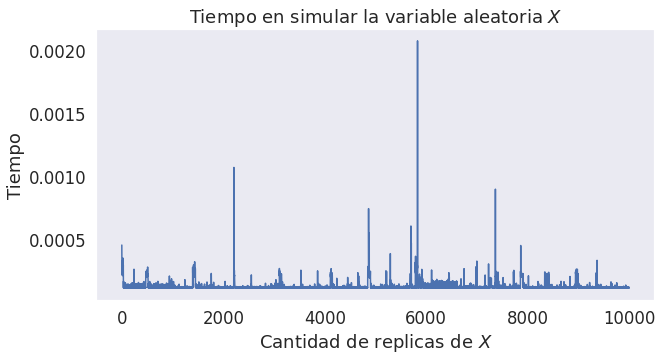

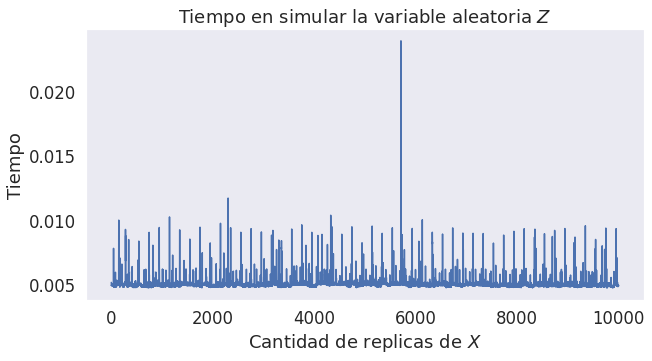

In [ ]:
grafica_tiempo_simular_X(10000)
grafica_tiempo_simular_Z(10000)

A continuación calculamos el costo de simular una réplica de la variable $X$ y $Z$ respectivamente.

In [ ]:
print("El costo de simular una réplica de X es "+ str(tiempo_simular_X(1000)/1000))
print("El costo de simular una réplica de Z es "+ str(tiempo_simular_Z(1000)/1000))

El costo de simular una réplica de X es 4.360675811767578e-07
El costo de simular una réplica de Z es 2.014875411987305e-06


## Parte 4
### Enunciado
Considerando $Err_{3}$ y $Pr_{3}$ calcule un intervalo de confianza para $I$ utilizando $X$ y $Z$. Mida el tiempo total utilizado por cada método para obtener dicha precisión y compare los errores de estimación. Compare los costos totales para cada método ¿Cuál es el ratio de eficiencia entre ambos métodos (entendido como el cuociente entre los costos totatles de ambos métodos, para obtener una precisión con un nivel de confianza dados)?
### Desarrollo
**Preliminar:** Recordemos que el teorema central del límite nos entrega que
\begin{equation*}
    \frac{\displaystyle \sum_{i=0}^{n} X_{i} - nI }{\sqrt{n}\sigma} = N \sim\mathcal{N}(0,1),\quad I = \frac{\pi}{4}
\end{equation*}

In [ ]:
"""=============================================================================
FUNCIONES DE LA CELDA:
1) tiempo_estimar_I_mediante_X
2) tiempo_estimar_I_mediante_Z
============================================================================="""
def tiempo_estimar_I_mediante_X(n):
    """=========================================================================
    Input: n = Cantidad de replicas de la variable aleatoria X.
    Output: Retorna el tiempo que demora en estimar I usando X.
    Comentario: Tuliza la funcion -simulacion_esperanza_X(n)- que guarda esta
    informacion a medida que estima la esperanza de X. La informacion se guarda
    en -simulacion_esperanza_X(n)[1]-.
    ========================================================================="""
    output = simulacion_esperanza_X(n)[1]
    return output
def tiempo_estimar_I_mediante_Z(n):
    """=========================================================================
    Input: n = Cantidad de replicas de la variable aleatoria Z.
    Output: Retorna el tiempo que demora en estimar I usando Z.
    Comentario: Tuliza la funcion -simulacion_esperanza_Z(n)- que guarda esta
    informacion a medida que estima la esperanza de Z. La informacion se guarda
    en -simulacion_esperanza_Z(n)[1]-.
    ========================================================================="""
    output = simulacion_esperanza_Z(n)[1]
    return output

**Respuestas:** Luego utilizando $n^{\star}$ suficiente para tener una buena estimación de $I$ según $X$ y $Z$ respectivamente, tenemos que los tiempos de estimación y los ratios son los siguientes:

In [ ]:
tiempo_segun_X = tiempo_estimar_I_mediante_X(330527)
tiempo_segun_Z = tiempo_estimar_I_mediante_Z(1114371)
print("El costo de estimar I usando X es "+ str(tiempo_segun_X))
print("El costo de estimar I usando Z es "+ str(tiempo_segun_Z))
print("El ratio de eficiencia de X sobre Z para estimar I es "+ str(tiempo_segun_X/tiempo_segun_Z))
print("El ratio de eficiencia de Z sobre X para estimar I es "+ str(tiempo_segun_Z/tiempo_segun_X))

El costo de estimar I usando X es 0.008452653884887695
El costo de estimar I usando Z es 0.5895700454711914
El ratio de eficiencia de X sobre Z para estimar I es 0.014336979888678424
El ratio de eficiencia de Z sobre X para estimar I es 69.74969678165459


## Parte 5
### Enunciado
Considerando nuevamente $Err_{3}$ y $Pr_{3}$ calcule el costo teórico de estimar $I$ ytilizando $X$ y $Z$, tomando como costo la cantidad de variables aleatorias uniformes necesarias. ¿Cuál método es más eficiente bajo este criterio? ¿Qué diferencia se observa entre comparar las eficiencias usando este criterio (número de uniformes) y el criterio anterior (costo total)? ¿Qué indica esa diferencia? ¿Cuál criterio debería preferirse en general?

### Desarrollo
El costo teórico al estimar $I$ utilizando las variables aleatorias $X$ y $Z$ son:
1.   Usando $X$ el costo es $C_{X} = n_{X}^{\star}$ (cantidad de variables uniformes), esto es
\begin{equation}
    C_{X} = 330327.
\end{equation}
2.   Usando $Z$ el costo es $C_{Z} = 2\cdot n_{Z}^{\star}$ (la cantidad de variables uniformes utilizadas se duplica ya que $Z$ depende de $U_{1}$ y $U_{2}$), esto es
\begin{equation}
    C_{Z} = 2\cdot1118000.
\end{equation}
Con el análisis anterior, nos referimos a estos costos como la cantidad de variables aleatorias uniformes utilizadas en la estimación de la esperanza (que corresponde a calcular $I$) considerando $Err_{3}$ y $Pr_{3}$. Bajo este criterio, el radio de eficencia $\frac{C_{Z}}{C_{X}} = 6.7 > 1$, por lo tanto es más eficiente utilizar la variable aleatoria $X$ para estimar $I$.

Además, notemos que para una muestra de $n$ réplicas de $Z$ tendremos que necesitamos $2n$ variables aleatorias uniformes, a esto sumado que antes hemos visto que para realizar los cálculos de $Z$ con una misma precisión que los cálculos de $X$ (esperanza Y varianza) se requiere de una cantidad mayor de réplicas, lo que hace sentido con el resultado de eficiencia obtenido.


# Problema 3

In [ ]:
# Librerias necesarias para corres el problema 3
import numpy as np
import math
from scipy import stats
import time
import matplotlib.pyplot as plt

## Partes 1 - 2 - 3
### Enunciado
A continuación haremos 3 métodos que se indican a continuación:

1.   Programe el método *DiscreteQuantile(f,u)*, que recibe como parámetros una función de masa discreta $f$ y un vector $u\in[0,1]^{r}$, y retorne el menor vector $n\in\mathbb{N}^{r}$ (coordenada a coordenada) tal que 
\begin{equation*}
    \sum_{j=0}^{n_{i}}f(j) \geq u_{i}.
\end{equation*}
2.   Programe el método *DiscreteQuantileF(f,u)*, que recibe como parámetros una función de distribución $F$ y un vector $u\in[0,1]^{r}$, y retorne el menor vector $n\in\mathbb{N}^{r}$ tal que $F(n_{i})\geq u_{i}$
3.   Programe el método *ContinuousQuantile(F,f,u)*, que recibe como parámetros una función de distribución $F$, su función de densidad $f$ y un vector $u\in[0,1]^{r}$, y aplique el método de Newton para calcular el vector $x\in\mathbb{R}^{r}$ tal que
\begin{equation*}
    |F(x_{i} - u_{i}| \leq error,
\end{equation*}
donde $error$ es un parámetro de la clase inicializando con $error = 10^{-4}$

### Desarrollo
**Razonamiento:** Para cada caso, razonamos como sigue:
1.   Se revisa coordenada a coordenada si
\begin{equation*}
    \sum_{j=1}^{n} f(j) \geq u_{i}
\end{equation*}
para ir construyendo $n$ con el menor $n_{i}$ que verifica la desigualdad anterior.
2.   De forma análoga, revisamos si
\begin{equation*}
    F(n_{i}) \geq u_{i}, 
\end{equation*}
para ir construyendo $n$ con el menor $n_{i}$ que verifica la desigualdad vista en (1).
3.   Este método deja de ser análogo. Para calcular $x_{i}$ utilizamos en método de Newton, el cual consiste en tomar la función $G(x) = F(x) - u_{i}$ y su derivada, luego
\begin{equation*}
    G'(x) = f(x),
\end{equation*}
por lo tanto podemos iterar de la siguiente manera:
\begin{equation*}
    x_{i} = x_{i-1} - \frac{G(x_{i-1})}{G'(x_{i-1})},
\end{equation*}
hasta cumplir que 
\begin{equation*}
    |F(x_{i}) - u_{i}| \leq error.
\end{equation*}
**Métodos:** Elaboramos las funciones según lo explicado antes. Las funciones son:

In [ ]:
"""=============================================================================
FUNCIONES EN LA CELDA:
1) DiscreteQuantile
2) DiscreteQuantileF
3) ContinuousQuantile
============================================================================="""
# Funcion parte 1
def DiscreteQuantile(f,u):
    """=========================================================================
    Input:
    Output:
    Comentario:
    ========================================================================="""
    n = []
    for i in range(len(u)):
        n_i = 1
        suma = f(n_i)
        while suma < u[i]:
            n_i = n_i + 1
            suma += f(n_i)
        n.append(n_i)
    output = n
    return output
# Funcion parte 2
def DiscreteQuantileF(F,u):
    """=========================================================================
    Input:
    Output:
    Comentario:
    ========================================================================="""
    n = []
    for i in range(len(u)):
        n_i = 0
        while F(n_i) < u[i]:
            n_i = n_i + 1
        n.append(n_i)
    output = n
    return output
# Funcion parte 3
def ContinuousQuantile(F,f,u,error = 10**(-4)):
    """=========================================================================
    Input:
    Output:
    Comentario:
    ========================================================================="""
    x = []
    for i in range(len(u)):
        x_i = 0.5
        while abs(F(x_i) - u[i]) >error:
            x_i = x_i - (F(x_i) - u[i])/f(x_i)
        x.append(x_i)
    output = x 
    return output

Consideremos una variable aleatoria discreta $X$ tal que
\begin{equation*}
    \mathbb{P} (X = j) = \left(\frac{1}{2}\right)^{j},\quad j\geq1.
\end{equation*}

## Parte 4
### Enunciado
Para $k=1,\dots,5$, simule $n = 10^{k}$ réplicas de $X$ para cada uno de los 3 métodos implementados, usando las mismas $n^{k}$ variables uniformes para cada uno de ellos (en el caso del método continuo utilice el comando *ceil* para redondear el resultado) ¿En qué medida coinciden los resultados de los tres métodos y por qué? Grafique el tiempo de ejecución de la cantidad de réplicas, estime el costo por réplica de cada uno de los métodos y ordene los métodos según su eficiencia.
### Desarrollo

In [ ]:
"""=============================================================================
FUNCIONES EN LA CELDA:
1) funcion_densidad_discreta
2) funcion_distribucion_discreta
3) funcion_densidad_continua
4) funcion_distribucion_continua
============================================================================="""
def funcion_densidad_discreta(x):
    if type(x) != int or x < 1:
        return 0
    else:
        return 2**(-x)
def funcion_distribucion_discreta(x):
    if x < 1:
        return 0
    else:
        return 1-(2**(-x))
def funcion_densidad_continua(x):
    if x == 0:
        return 0
    else:
        return 2**(-x)
def funcion_distribucion_continua(x):
    if x == 0:
        return 0
    else:
        return 1 - 2**(-x)

In [ ]:
def plothisto(k):
  u_1 = np.random.uniform(0,1, 10**k)
  u_2 = np.random.uniform(0,1, 10**k)
  u_3 = np.random.uniform(0,1, 10**k)

  sample_1 = DiscreteQuantile(funcion_densidad_discreta, u_1)
  sample_2 = DiscreteQuantileF(funcion_distribucion_discreta, u_2)
  sample_3 = ContinuousQuantile(funcion_distribucion_continua, funcion_densidad_continua, u_3)

  df_s1 = pd.DataFrame(data=sample_1, columns=['muestras']).assign(group = 'DQ')
  df_s2 = pd.DataFrame(data=sample_2, columns=['muestras']).assign(group = 'DQF')
  df_s3 = pd.DataFrame(data=sample_3, columns=['muestras']).assign(group = 'CQ')

  df_tot = pd.concat([df_s1, df_s2, df_s3]).reset_index().drop(columns=['index'])
  
  fig = plt.gcf()
  fig.set_size_inches(15, 8)
  sns.set(font_scale = 1.5)
  ax = sns.histplot(data = df_tot, x = 'muestras', binwidth=0.9, hue= 'group', multiple='dodge')
  ax.set(xlabel = 'Valor',
          ylabel='Repeticiones',
        title = 'Comparación de los distintos métodos para k = {}'.format(k))
  plt.show()

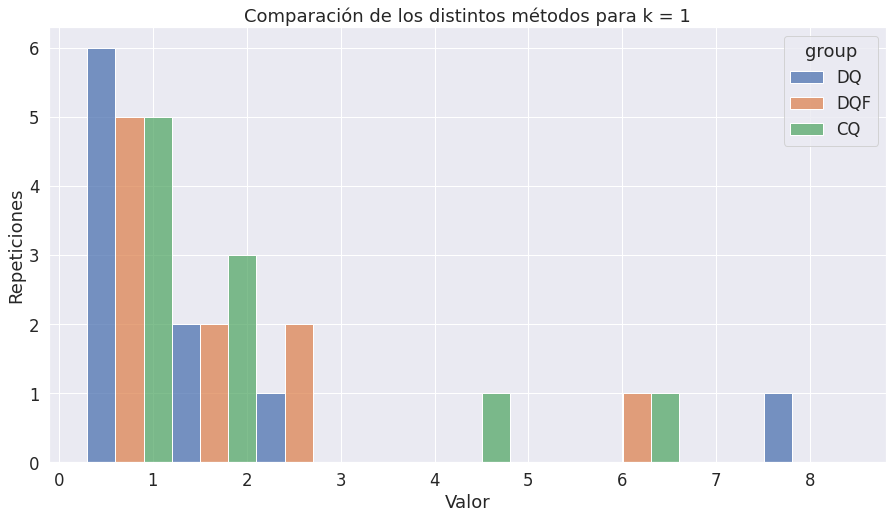

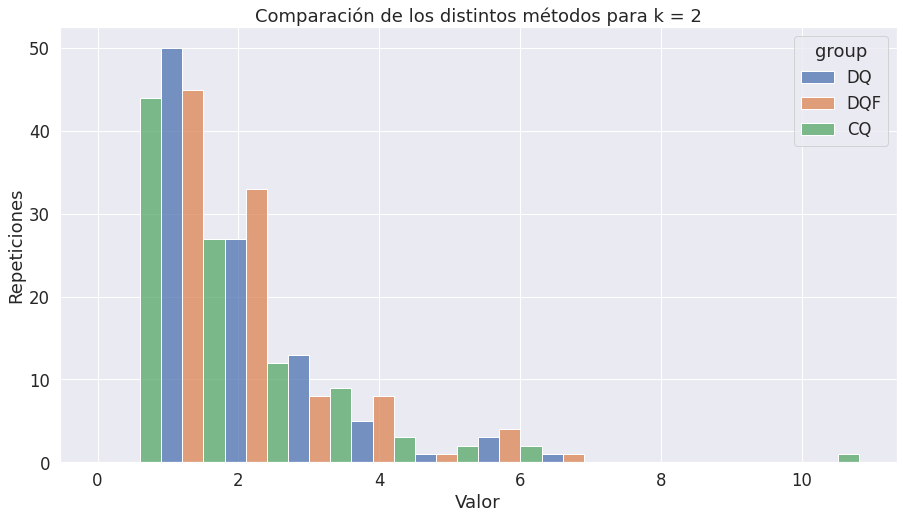

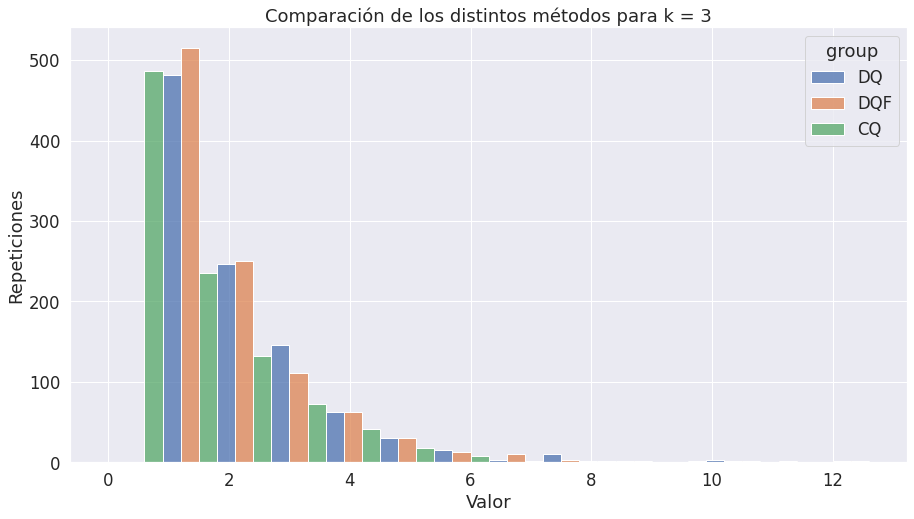

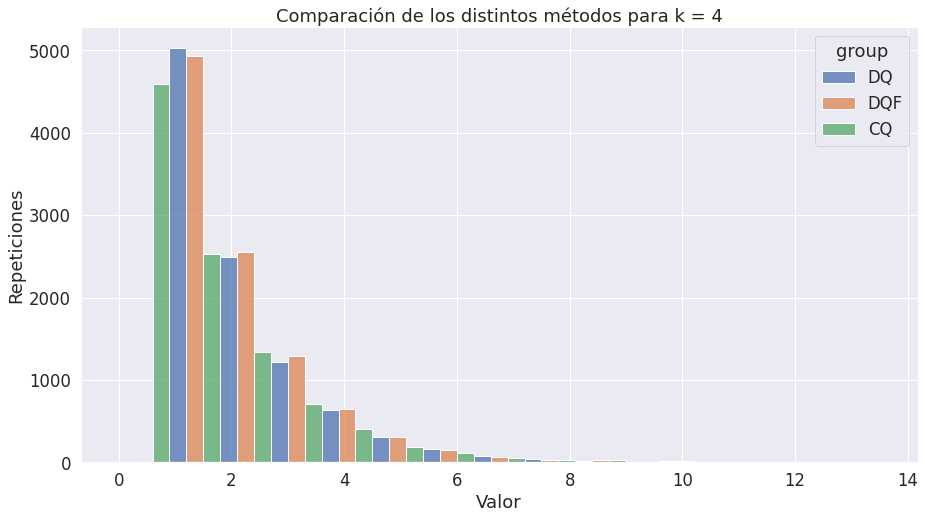

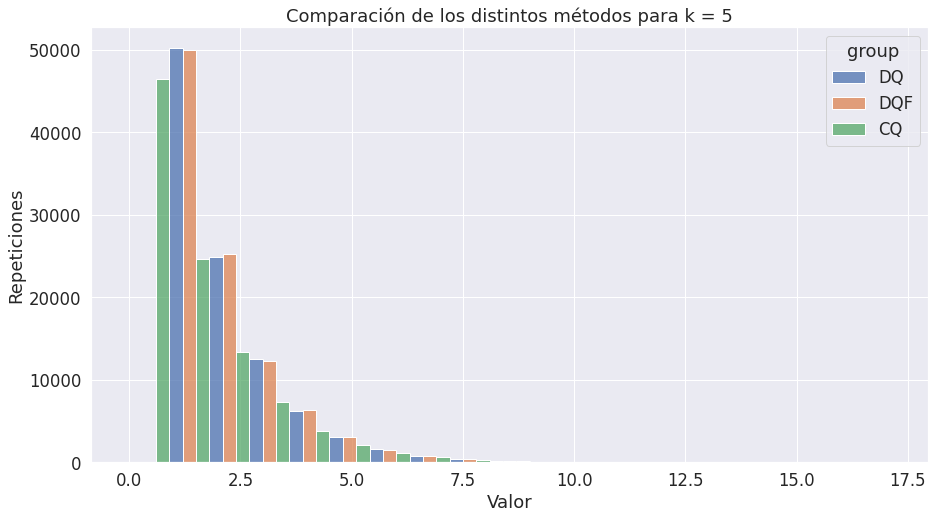

In [ ]:
for i in range(5):
  k = i + 1
  plothisto(k)

In [ ]:
def midetiempo(k):
  u_1 = np.random.uniform(0,1, 10**k)
  u_2 = np.random.uniform(0,1, 10**k)
  u_3 = np.random.uniform(0,1, 10**k)

  tic = time.perf_counter()
  sample_1 = DiscreteQuantile(funcion_densidad_discreta, u_1)
  tac = time.perf_counter()
  sample_2 = DiscreteQuantileF(funcion_distribucion_discreta, u_2)
  tic_1 = time.perf_counter()
  sample_3 = ContinuousQuantile(funcion_distribucion_continua, funcion_densidad_continua, u_3)
  tac_1 = time.perf_counter()
  
  return [tac - tic, tic_1 - tac, tac_1 - tic_1]

In [ ]:
t_DQ = []
t_DQF = []
t_CQ = []
for i in range(5):
  lol = midetiempo(i+1)
  t_DQ.append(lol[0])
  t_DQF.append(lol[1])
  t_CQ.append(lol[2])

In [ ]:
def ploteatiempos(t1,t2,t3):
  y = ['10', '100', '1000', '10000', '100000']
  plt.plot(y, t1, label = 'DQ')
  plt.plot(y, t2, label = 'DQF')
  plt.plot(y, t3, label = 'CQ')
  plt.xlabel('Cantidad de Réplicas')
  plt.ylabel('Tiempo')
  plt.title('Comparación de tiempos entre los 3 métodos')
  plt.legend()
  plt.show()

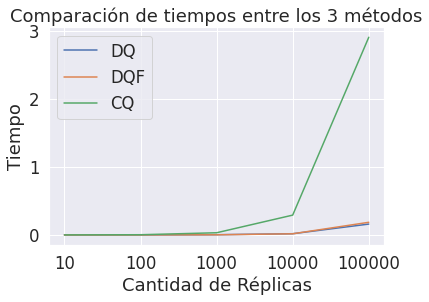

In [ ]:
ploteatiempos(t_DQ,t_DQF, t_CQ)

In [ ]:
costo_DQ = []
costo_DQF = []
costo_CQ = []

for i in range(5):
  costo_DQ.append(t_DQ[i]/10**(i+1))
  costo_DQF.append(t_DQF[i]/ 10**(i+1))
  costo_CQ.append(t_CQ[i]/10**(i+1))

In [ ]:
R1 = np.array(costo_CQ).mean()
R2 = np.array(costo_DQ).mean()
R3 = np.array(costo_DQF).mean()

In [ ]:
print('Costo promedio por replica usando DiscreteQuantile: ', R1)
print('Costo promedio por replica usando DiscreteQuantileF: ', R2)
print('Costo promedio por replica usando ContinuousQuantile: ', R3)

Costo promedio por replica usando DiscreteQuantile:  3.0307119520639394e-05
Costo promedio por replica usando DiscreteQuantileF:  2.5177761421800825e-06
Costo promedio por replica usando ContinuousQuantile:  1.9024698153953065e-06


Considerando los costos promedio por replica mostrados anteriormente vemos que el método "DiscreteQuantileF" es óptimo, si comparamos con el método continuo vemos que hay una gran diferencia por motivos obvios, sin embargo, la única diferencia que se aprecia entre DQ y DQF, es que la función de distribucion es la suma (que realiza la función DQ internamente) de la función de densidad, lo cual es una adición computacional que aumenta a medida que aumentan las réplicas. Con esto, vemos que DQ > DQF > CQ.

##Parte 5

In [ ]:
def medyvar(k):
  u = np.random.uniform(0,1, 10**k)
  sample = DiscreteQuantileF(funcion_distribucion_discreta, u)
  med = np.array(sample).mean()
  var = np.array(sample).mean()
  return med, var

In [ ]:
meds = []
vars = []
for i in range(5):
  med, var = medyvar(i+1)
  meds.append(med)
  vars.append(var)

In [ ]:
def plotmed(meds):
  y = ['10', '100', '1000', '10000', '100000']
  plt.plot(y, meds, label = 'Media')
  plt.plot(y, [2,2,2,2,2], label = 'Media teórica')
  plt.legend()
  plt.title('Media muestral de los datos en función de la cantidad de réplicas')
  plt.xlabel('Cantidad de réplicas')
  plt.ylabel('Media')
  plt.show()

def plotvar(vars):
  y = ['10', '100', '1000', '10000', '100000']
  plt.plot(y, vars, label= 'Varianza')
  plt.plot(y, [2,2,2,2,2], label = 'Varianza teórica')
  plt.title('Varianza muestral de los datos en función de la cantidad de réplicas')
  plt.xlabel('Cantidad de réplicas')
  plt.ylabel('Varianza')
  plt.legend()
  plt.show()

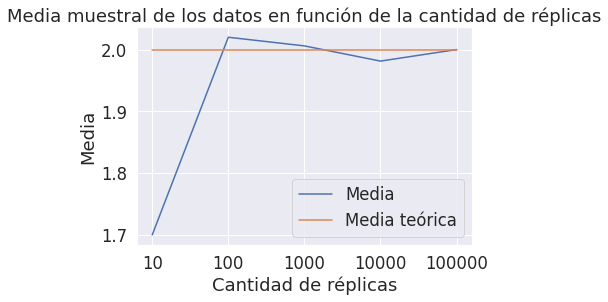

In [ ]:
plotmed(meds)

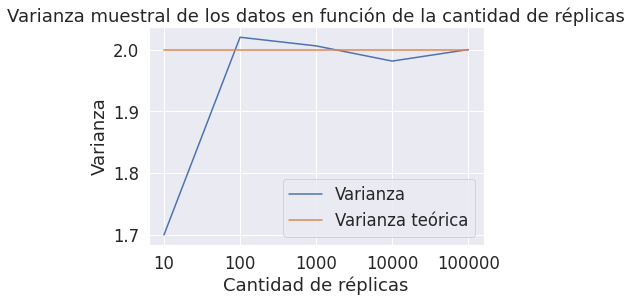

In [ ]:
plotvar(vars)

# Problema 4

In [ ]:
# Librerias necesarias para correr el problema 4
import numpy as np
import scipy as sp
import random 
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import time


Consideremos la variable aleatoria discreta $Y_{\lambda,s}$ tal que
\begin{equation}
    \mathbb{P}(Y_{\lambda,s} = k) = \frac{e^{-\lambda}\lambda^{k}}{k!\displaystyle\sum_{j=0}^{s} \frac{e^{-\lambda}\lambda^{j}}{j!}}.
\end{equation}

Para los cálculos y evaluaciones consideraremos $\lambda = 1$ y $s = 8$.

## Parte 1
### Enunciado
Escriba dos métodos para simular $n$ réplicas de $Y_{\lambda,s}$, el primero utilizando variables aleatorias uniformes discretas de parámetro $s$ y el segundo método utilizando variables aleatorias de Poisson de parámetro $\lambda$. Evalúe y analice la eficiencia teórica y numérica de ambos métodos. Para el segundo método la variable aleatoria Poisson debe simularse utilizando variables uniformes.
### Desarrollo
A continuación generamos variables uniformes y de Poisson que serán necesarias para nuestros métodos a desarrollar.

In [ ]:
"""=============================================================================
FUNCIONES DE LA CELDA:
1) variable_uniforme
2) variable_poisson
============================================================================="""
# Variables aleatorias para aproximar
def variable_uniforme():
    """=========================================================================
    Output: Genera una variable uniforme.
    Comentario: Discreta de sorporte [0,s] y P(X = x_k) = 1/(s+1)
    ========================================================================="""
    # Parametros del enunciado
    s = 8
    # Se crea la partición
    particion = [0*n for n in range(s+2)]   # Particion
    for i in range(s+2):
        if i == 0:                          # Primer intervalo
            particion[i] = 0                # El intervalo inicial comienza en 0
        elif i == len(particion)-1:         # Ultimo intervalo
            particion[i] = 1                # El último intervalo termina en 1
        else:                               # Cualquier otro intervalo acumula
            a = np.sum([1/(s+1) for k in range(i)])
            particion[i] = a
    # Se cre una variable uniforme continua y se genera la variable discreta
    uniforme = np.random.uniform(0,1)
    pares = [[particion[i], particion[i + 1]] for i in range(len(particion)-1)] 
    for i in range(len(pares)):
        #Se retorna i si u está en [a_i-1, a_i]
        if uniforme >= pares[i][0] and uniforme <= pares[i][1]: 
            output = range(s+1)[i] 
            return output
def variable_poisson():
    """=========================================================================
    Output: Genera una variable aleatoria Poisson de parametro lambda a partir
    de una coleccion de variables uniformes.
    Comentario: Se raliza de forma analoga a variable_uniforme(), pero los a_n
    de la particion se obtienen acumulando la distribucion de una Poisson
    ========================================================================="""
    # Parametros del enunciado
    s = 8
    parametro_lambda = 1
    # Se crea la partición
    particion = [0*n for n in range(s+2)]   # Particion
    for i in range(s+2):                    
        if i == 0:                          # Primer intervalo
            particion[i] = 0                # El intervalo inicial comienza en 0
        elif i == len(particion)-1:         # Ultimo intervalo
            particion[i] = 1                # El último intervalo termina en 1
        else:                               # Cualquier otro intervalo acumula
            a = np.sum([np.exp(-parametro_lambda)*parametro_lambda**k/
                        np.math.factorial(k) for k in range(i)])
            particion[i] = a  
    # Se crea una variable uniforme continua para generar la poisson  
    uniforme = np.random.uniform(0,1) 
    pares = [[particion[i], particion[i + 1]] for i in range(len(particion)-1)] 
    for i in range(len(pares)):
        #Se retorna i si u está en [a_i-1, a_i]
        if uniforme >= pares[i][0] and uniforme <= pares[i][1]: 
            output = range(s+1)[i] 
            return output


A continuación programamos los métodos para aproximar la variable aleatoria, donde cada método:
1.   Depende de aproximaciones mediante variables aleatorias uniformes.
2.   Depende de aproximaciones mediante variables aleatorias Poisson.



In [ ]:
"""=============================================================================
FUNCIONES DE LA CELDA:
1) metodo_1
2) replicas_metodo_1
3) metodo_2
4) replicas_metodo_2
============================================================================="""
def metodo_1():
    """=========================================================================
    Output: Entrega una réplica de la variable Y construido sobre variables 
    uniformes discretas y el tiempo de ejecución en la ejecución de cada réplica
    ========================================================================="""
    # Constantes del enunciado 
    s = 8
    parametro_lambda = 1
    condicion = True
    while condicion:
        constante = s+1 # Constante elegida
        # Se simula una V.A. uniforme discreta usando la funcion
        # variable_uniforme() definida antes
        simulacion_uniforme_discreta = variable_uniforme()     
        numerador = (np.exp(-parametro_lambda)*parametro_lambda**
                      simulacion_uniforme_discreta/
                       np.math.factorial(simulacion_uniforme_discreta))
        denominador = (np.sum([np.exp(-parametro_lambda)*parametro_lambda**j/
                               np.math.factorial(j) for j in range(s+1)]))
        p = numerador/denominador   #Distribución de la variable a estimar
        q = 1/(s+1)                 #Distribución de la variable conocida
        # Se simula una V.A. uniforme continua
        simulacion_uniforme_continua = np.random.uniform(0,1) 
        # Si cumple la condición se retorna la V.A. uniforme discreta
        if simulacion_uniforme_continua <= p/(constante*q): 
            output = simulacion_uniforme_discreta
            return output
            condicion = False          
        # Si no se cumple la condicion se vuelve a iniciar
def replicas_metodo_1(n):
    """=========================================================================
    Input: Numero de réplicas n
    Output: Genera n réplicas de la variable Y con el método 1 y ademas entrega 
    el tiempo en que demora en generar una réplica.
    Comentario: Esta funcion reemplaza rerun().
    ========================================================================="""
    vector = []
    for i in range(n):
        X = metodo_1()
        vector.append(X)
    output = vector
    return output
def metodo_2():
    """=========================================================================
    Output: una réplica de la variable Y construido sobre variables que 
    distribuyen Poisson.
    ========================================================================="""
    # Constantes del enunciado 
    s = 8
    parametro_lambda = 1
    condicion = True
    while condicion:
        # Constante elegida
        constante = (1/(np.sum([np.exp(-parametro_lambda)*parametro_lambda**j/
                                np.math.factorial(j) for j in range(s)])))
        # Se simula una V.A. poisson
        simulacion_poisson = variable_poisson()
        numerador = (np.exp(-parametro_lambda)*parametro_lambda**
                     simulacion_poisson/np.math.factorial(simulacion_poisson))
        denominador = (np.sum([np.exp(-parametro_lambda)*parametro_lambda**j/
                               np.math.factorial(j) for j in range(s)]))
        # Distribución de la variable a estimar
        p = numerador/denominador 
        # Distribucion de la variable conocida
        q = (np.exp(-parametro_lambda)*parametro_lambda**simulacion_poisson/
             np.math.factorial(simulacion_poisson))
        # Se simula una V.A. uniforme continua
        simulacion_uniforme_continua = np.random.uniform(0,1)
        # Si cumple la condición se retorna el valor de la V.A. poisson
        if simulacion_uniforme_continua < p/(constante*q):
            output = simulacion_poisson
            return output 
            condition = False     
            #si no se cumple la condicion se vuelve a empezar
def replicas_metodo_2(n):
    """=========================================================================
    Input: Numero de réplicas n
    Output: Genera n réplicas de la variable Y con el método 2 y ademas entrega 
    el tiempo en que demora en generar una réplica.
    Comentario: Esta funcion reemplaza rerun().
    ========================================================================="""
    vector = []
    for i in range(n):
        X = metodo_2()
        vector.append(X)
    output = vector
    return output

def plot_replica_2(n):
  """===========================================================================
  Input: Número de réplicas n
  Output: Genera Gráfico valor vs repeticiones para método 2, imprime tiempo de 
  ejecución e imprime eficiencia teórica.
  ==========================================================================="""
    inicio=time.time()
    L_1=replicas_metodo_2(n)
    L_2=set(sorted(L_1, reverse=True))
    L_3=[]
    L_4=[]
    L_5=[]
    a=list(zip(L_2,map(lambda x: L_1.count(x),L_2)))
    for j in range(len(L_2)):
        L_3.append(a[j][0])
        L_4.append(a[j][1])
    L_5.append(L_4)
    L_5.append(L_3)
    fin=time.time()
    plt.bar(L_5[1],L_5[0])
    print('Tiempo de ejecución =', fin-inicio)
    print('Eficiencia Teoría: Constante = (1/(np.sum([np.exp(-parametro_lambda)*parametro_lambda**j/np.math.factorial(j) for j in range(s)]))) ~ 1, con lambda=1')
    plt.title("Método 2")
    plt.xlabel("Valor")
    plt.ylabel("Repeticiones"),
    return plt.show()

def plot_replica_1(n):
  """===========================================================================
  Input: Número de réplicas n
  Output: Genera Gráfico valor vs repeticiones para método 1, imprime tiempo de 
  ejecución e imprime eficiencia teórica.
  ==========================================================================="""
    inicio=time.time()
    L_1=replicas_metodo_1(n)
    L_2=set(sorted(L_1, reverse=True))
    L_3=[]
    L_4=[]
    L_5=[]
    a=list(zip(L_2,map(lambda x: L_1.count(x),L_2)))
    for j in range(len(L_2)):
        L_3.append(a[j][0])
        L_4.append(a[j][1])
    L_5.append(L_4)
    L_5.append(L_3)
    fin=time.time()
    plt.bar(L_5[1],L_5[0], color='red')
    print('Tiempo de ejecución =',fin-inicio)
    print('Eficiencia Teoría: Constante = s+1 = 9, con s=8')
    plt.title("Método 1"),plt.xlabel("Valor")
    plt.ylabel("Repeticiones")
    return plt.show()

In [ ]:
plot_replica_1(10000)

In [ ]:
 plot_replica_2(10000)

Por lo tanto, la eficiencia teórica y numérica coinciden para ambos métodos (en relación a cual es más grande que la otra).


## Parte 2
### Enunciado
Realice un análisis completo para estimar $\mathbb{E}(Y_{\lambda,s})$ con una precisión de $0.2$ y nivel de congianza del $95\%$. El análisis debe considerar los dos métodos iplementados, cantidad de réplicas, número de variables aleatorias uniformes, tiempo de ejecución, varianza, media y gráficos.

### Desarrollo
Para estimar la varianza primero notemos que necesitamos una muestra de tamaño $n$, deseamos cierta presición y elegir un estimador. A continuación decidimos cómo elegir los métodos antes de implementar el código.

**Función auxiliar de varianza:** La varizanza la calculamos según el método del estimador insesgado, el cual premite realizar la siguiente aproximación:
\begin{equation}
    \sigma^{2} \approx \frac{1}{n-1} \sum_{i=1}^{n} (X_{i} - \overline{X})^{2},
\end{equation}
donde $\overline{X}$ es el promedio.

**Cantidad de iteraciones:** El número de réplicas $n$ para hallar $\sigma^{2}$ se puede estimar con la siguiente cota:
\begin{equation}
    n \geq \frac{\sigma^{2}\cdot Z^{2}_{\alpha/2}}{\epsilon^{2}},
\end{equation}
dodne $\alpha$ es la probabilidad del intervalo de confianza, $\epsilon$ es la presición deseada y $\sigma^{2}$ el estimador a estudiar, que se presenta en detalló antes.

**Función auxiliar de esperanza:** La esperanza de una variable aleatoria la cálculamos mediante la ley de grandes números mediante el método de Monte Carlo, esto es mediante:
\begin{equation}
    \frac{1}{n}\sum_{i=1}^{n} X_{i} \underset{n\to\infty}{\longrightarrow} \mathbb{E}(X).
\end{equation}


In [ ]:
"""=============================================================================
FUNCIONES DE LA CELDA:
1) esperanza_estimada
2) varianza_estimada
3) numero_de_replicas_varianza
============================================================================="""
# Estimador de esperanza
def esperanza_estimada(x):
    """=========================================================================
    Input: Un vector de variables aleatorias x.
    Output: La esperanza estimada a partir de un vector de variables aleatorias.
    ========================================================================="""
    # Estimamos la esperanza segun el estimador usual
    esperanza_estimada = np.sum(x)/(len(x))
    output = esperanza_estimada    
    return output
# Estimador de varianza insesgada
def varianza_estimada(x):
    """=========================================================================
    Input: Un vector de variables aleatorias x.
    Output: La varianza estimada a partir de un vector de variables aleatorias.
    ========================================================================="""
    # Estimamos la varianza segun el estimador usual
    varianza_estimada = np.sum(np.square(np.subtract(x,np.mean(x))))/(len(x)-1)
    output = varianza_estimada
    return output
def numero_de_replicas_varianza(x,alpha,epsilon):
    """=========================================================================
    Input: Un vector de variables aleatorias x, alpha es la probabilidad deseada
    para el intervalo de confianza y epsilon la precision deseada para el 
    estimador.
    Output: La menor cantidad de replicas necesarias para cumplir con la cota
    de precision con probabilidad alpha y presicioin epsilon.
    ========================================================================="""
    varianza = varianza_estimada(x)
    z = -norm.interval(alpha,loc=0)[0]
    cantidad_de_replicas = np.floor(np.ceil(varianza*(z/epsilon)**2)) + 1
    output = cantidad_de_replicas
    return output

**Análisis de los métodos** Analizamos ambos métodos viendo cómo actúan en función de la cantidad de réplicas.

In [ ]:
"""=============================================================================
FUNCIONES DE LA CELDA:
1) grafico_esperanza_metodo_1
2) grafico_esperanza_metodo_2
3) grafico_varianza_metodo_1
4) grafico_varianza_metodo_2
============================================================================="""
# Valores teoricos de esperanza y varianza
esp_teo = 1
var_teo = 1
# Funciones graficadoras
def grafico_esperanza_metodo_1(n):
    """=========================================================================
    Input: Cantidad de replicas.
    Output: Entrega un grafico de la esperanza en funcion de la cantidad de 
    replicas utilizadas para calcular la esperanza, esto utilizando el metodo 1
    de estimacion de la V.A.
    Tiempo de Ejecución
    ========================================================================="""
    inicio=time.time()
    # Cantidad de replicas desde 0 hasta n guardadas en un vector
    cantidad_de_replicas = np.arange(0, n)
    # Lista vacia para guardar las esperanzas
    esperanza = []
    # Calcular esperanza hasta una cantidad i-esima de replicas
    for i in range(len(cantidad_de_replicas)):
        esperanza.append(esperanza_estimada(replicas_metodo_1(i)))
    # Configuracion de la figura
    plt.figure(figsize=(10, 5))
    plt.grid()
    plt.title('Estimacion de la esperanza de $Y_{\lambda,s}$ con el método 1')
    plt.xlabel('Cantidad de replicas de $Y_{\lambda,s}$')
    plt.ylabel('Estimacion de $\mathbb{E}($Y_{\lambda,s}$)$')
    plt.fill_between(cantidad_de_replicas, esp_teo-0.01*esp_teo, 
                     esp_teo+0.01*esp_teo, alpha=0.5,
                     edgecolor='#CC4F1B', facecolor='#FF9848')
    output = plt.plot(cantidad_de_replicas,esperanza)
    fin=time.time()
    print('Tiempo de Ejecución =', fin-inicio)
    return output
def grafico_esperanza_metodo_2(n):
    """=========================================================================
    Input: Cantidad de replicas.
    Output: Entrega un grafico de la esperanza en funcion de la cantidad de 
    replicas utilizadas para calcular la esperanza, esto utilizando el metodo 2
    de estimacion de la V.A.
    Tiempo de Ejecución
    ========================================================================="""
    inicio=time.time()
    # Cantidad de replicas desde 0 hasta n guardadas en un vector
    cantidad_de_replicas = np.arange(0, n)
    # Lista vacia para guardar las esperanzas
    esperanza = []
    # Calcular esperanza hasta una cantidad i-esima de replicas
    for i in range(len(cantidad_de_replicas)):
        esperanza.append(esperanza_estimada(replicas_metodo_2(i)))
    # Configuracion de la figura
    plt.figure(figsize=(10, 5))
    plt.grid()
    plt.title('Estimacion de la esperanza de $Y_{\lambda,s}$ con el método 2')
    plt.xlabel('Cantidad de replicas de $Y_{\lambda,s}$')
    plt.ylabel('Estimacion de $\mathbb{E}($Y_{\lambda,s}$)$')
    plt.fill_between(cantidad_de_replicas, esp_teo-0.01*esp_teo, 
                     esp_teo+0.01*esp_teo, alpha=0.5,
                     edgecolor='#CC4F1B', facecolor='#FF9848')
    output = plt.plot(cantidad_de_replicas,esperanza)
    fin=time.time()
    print('Tiempo de Ejecución =', fin-inicio)
    return output
def grafico_varianza_metodo_1(n):
    """=========================================================================
    Input: Cantidad de replicas.
    Output: Entrega un grafico de la varianza en funcion de la cantidad de 
    replicas utilizadas para calcular la esperanza, esto utilizando el metodo 1
    de estimacion de la V.A.
    Tiempo de Ejecución
    ========================================================================="""
    inicio=time.time()
    # Cantidad de replicas desde 0 hasta n guardadas en un vector
    cantidad_de_replicas = np.arange(0, n)
    # Lista vacia para guardar las varianzas
    varianza = []
    # Calcular varianza hasta una cantidad i-esima de replicas
    for i in range(len(cantidad_de_replicas)):
        varianza.append(varianza_estimada(replicas_metodo_1(i)))
    # Configuracion de la figura
    plt.figure(figsize=(10, 5))
    plt.grid()
    plt.title('Estimacion de la varianza de $X$ con método 1')
    plt.xlabel('Cantidad de replicas de $X$')
    plt.ylabel('Estimacion de $\mathbb{V}ar(X)$')
    plt.fill_between(cantidad_de_replicas, var_teo-0.01*var_teo, 
                     var_teo+0.01*var_teo, alpha=0.5,
                     edgecolor='#CC4F1B', facecolor='#FF9848')
    output = plt.plot(cantidad_de_replicas,varianza)
    fin=time.time()
    print('Tiempo de Ejecución =', fin-inicio)
    return output
def grafico_varianza_metodo_2(n):
    """=========================================================================
    Input: Cantidad de replicas.
    Output: Entrega un grafico de la varianza en funcion de la cantidad de 
    replicas utilizadas para calcular la esperanza, esto utilizando el metodo 1
    de estimacion de la V.A.
    Tiempo de ejecución
    ========================================================================="""
    inicio=time.time()
    # Cantidad de replicas desde 0 hasta n guardadas en un vector
    cantidad_de_replicas = np.arange(0, n)
    # Lista vacia para guardar las varianzas
    varianza = []
    # Calcular varianza hasta una cantidad i-esima de replicas
    for i in range(len(cantidad_de_replicas)):
        varianza.append(varianza_estimada(replicas_metodo_2(i)))
    # Configuracion de la figura
    plt.figure(figsize=(10, 5))
    plt.grid()
    plt.title('Estimacion de la varianza de $X$ con método 2')
    plt.xlabel('Cantidad de replicas de $X$')
    plt.ylabel('Estimacion de $\mathbb{V}ar(X)$')
    plt.fill_between(cantidad_de_replicas, var_teo-0.01*var_teo, 
                     var_teo+0.01*var_teo, alpha=0.5,
                     edgecolor='#CC4F1B', facecolor='#FF9848')
    output = plt.plot(cantidad_de_replicas,varianza)
    fin=time.time()
    print('Tiempo de ejecución =', fin-inicio)
    return output
  
def grafico_numero_replicas_varianza_metodo_1(n, alpha, epsilon):
  cantidad_de_replicas = np.arange(0, n)
  replicas=[]
  for i in range(len(cantidad_de_replicas)):
    replicas.append(numero_de_replicas_varianza(replicas_metodo_1(i), alpha, epsilon))
  plt.figure(figsize=(10, 5))
  plt.grid()
  plt.title('Estimacion de las replicas de $X$ con método 1')
  plt.xlabel('Cantidad de replicas de $X$')
  plt.ylabel('Estimacion de replicas')
  output = plt.plot(cantidad_de_replicas,replicas)
  return output

def grafico_numero_replicas_varianza_metodo_2(n, alpha, epsilon):
  cantidad_de_replicas = np.arange(0, n)
  replicas=[]
  for i in range(len(cantidad_de_replicas)):
    replicas.append(numero_de_replicas_varianza(replicas_metodo_2(i), alpha, epsilon))
  plt.figure(figsize=(10, 5))
  plt.grid()
  plt.title('Estimacion de las replicas de $X$ con método 2')
  plt.xlabel('Cantidad de replicas de $X$')
  plt.ylabel('Estimacion de replicas')
  output = plt.plot(cantidad_de_replicas,replicas)
  return output

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


Tiempo de Ejecución = 5.542627573013306


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


Tiempo de Ejecución = 1.2390954494476318


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


Tiempo de Ejecución = 5.4396162033081055


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


Tiempo de ejecución = 1.2435760498046875


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


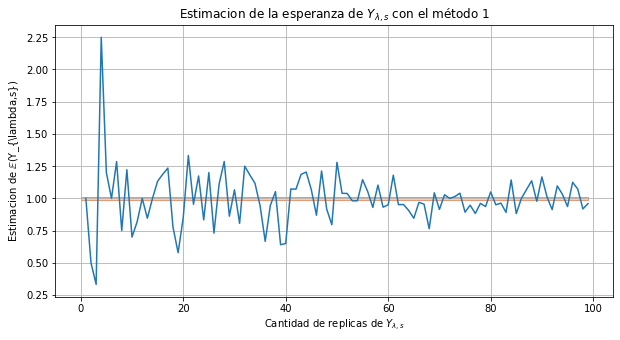

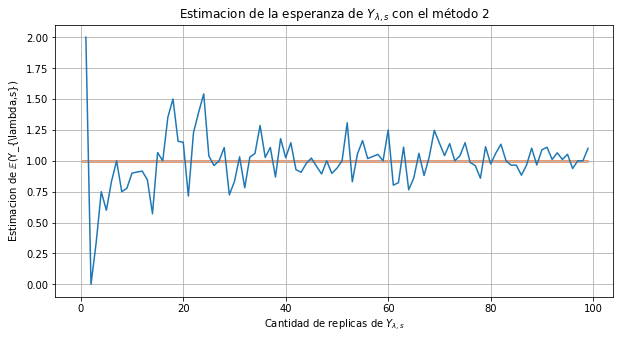

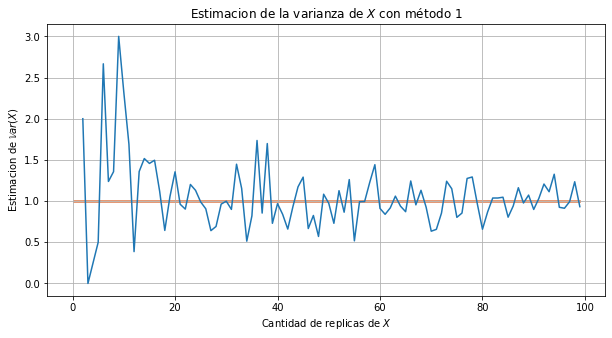

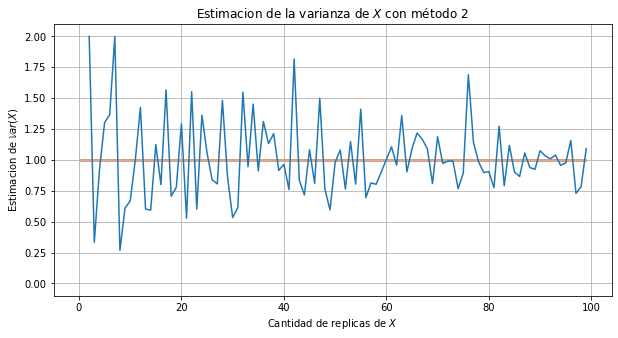

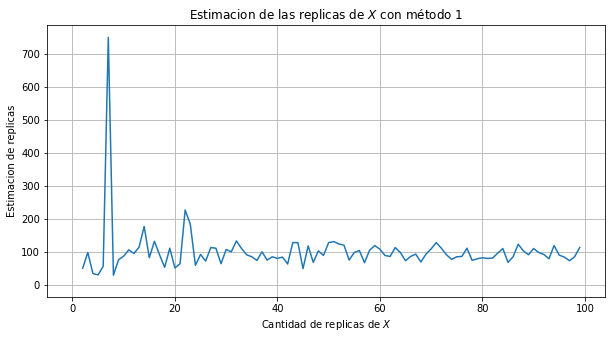

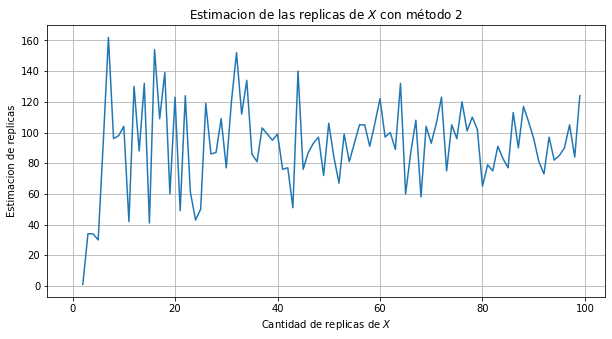

In [ ]:
"""=============================================================================
Comentario: 
La ejecucion con n = 100 demora un poco, pero un tiempo razonable, 
hay que probar con ordenes de magnitud mayor ya que no se tiene estabilidad 
segura con n = 100. Al probar con n = 1000 hubo que dejarlo el codigo corriendo
un par de horas. Queda propuesto ver un resultado con n = 10^{k} con k >= 4.
============================================================================="""
# Figuras de la varianza en funcion de la cantidad de replicas
grafico_esperanza_metodo_1(100)
grafico_esperanza_metodo_2(100)
grafico_varianza_metodo_1(100)
grafico_varianza_metodo_2(100)
grafico_numero_replicas_varianza_metodo_1(100, 0.95, 0.2)
grafico_numero_replicas_varianza_metodo_2(100, 0.95, 0.2)

Ojo que al parecer los últimos dos gráficos son la estimación de v.a uniformes ocupadas, no como aparece en sus labels y título.